## Exploratory Data Analysis

In [93]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [94]:
data_df=pd.read_csv('asp/StudentsPerformance.csv')

In [95]:
data_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [96]:
data_df.info()
#we have numerical data of scores of subjects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [97]:
data_df.describe()
# iT DESCRIBES ONLY NUMERICAL VALUES

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [98]:
for col in data_df.columns:
    print(f'[{col}]: {data_df[col].unique()}') # this will print unique values


[gender]: ['female' 'male']
[race/ethnicity]: ['group B' 'group C' 'group A' 'group D' 'group E']
[parental level of education]: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
[lunch]: ['standard' 'free/reduced']
[test preparation course]: ['none' 'completed']
[math score]: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
[reading score]: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
[writing score]: [ 74 

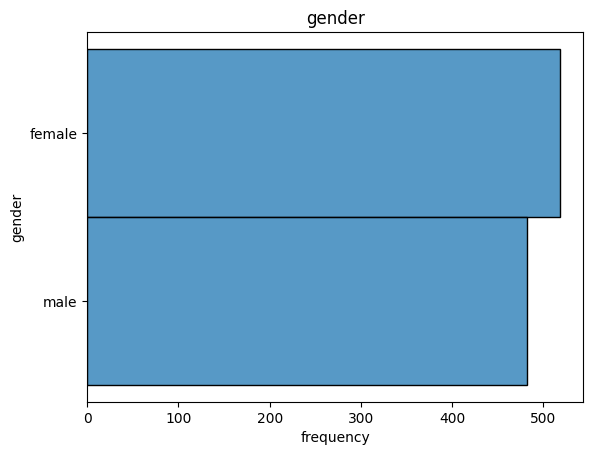

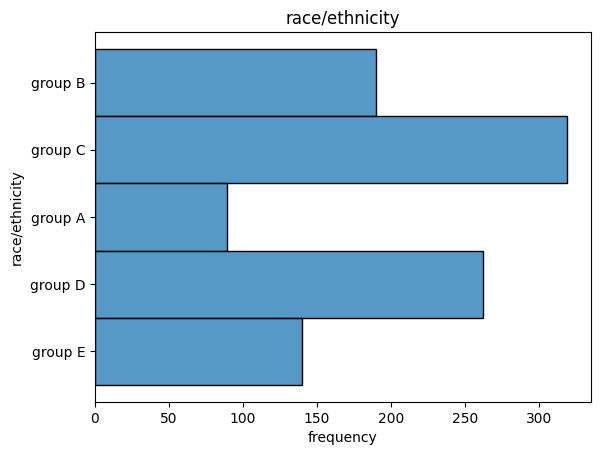

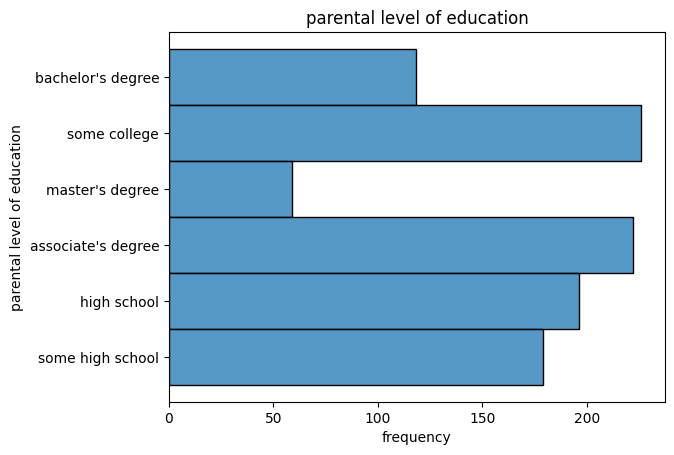

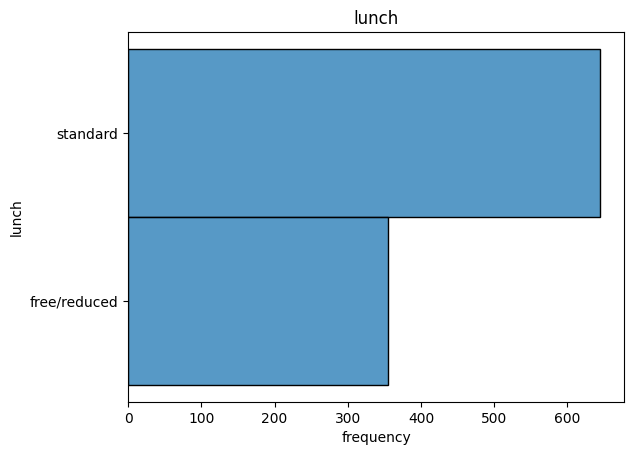

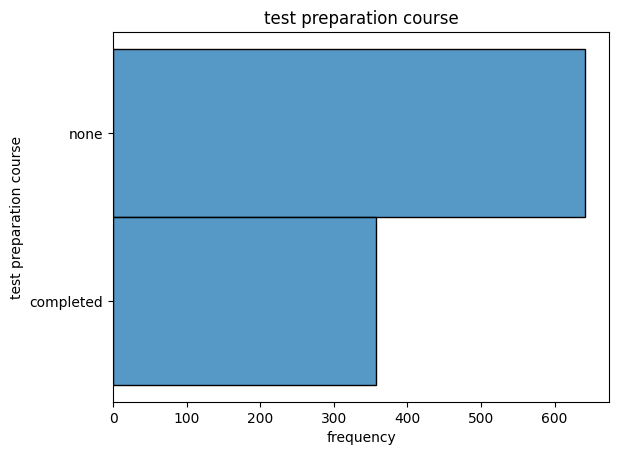

In [99]:
cat_cols = [ 'gender','race/ethnicity','parental level of education','lunch','test preparation course']
for count,col in enumerate(cat_cols):
    fig, ax= plt.subplots()

    colCount = data_df[col].value_counts()
    ax.set_title(col)
    ax.set_xlabel('frequency')
    sns.histplot(data=data_df,y=col,ax=ax)

## 8th Oct

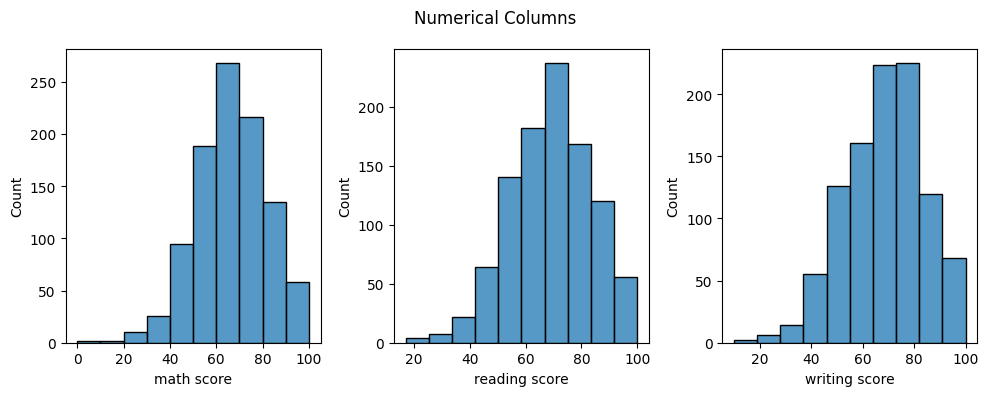

In [100]:
num_cols=[ "math score", "reading score", "writing score"]

fig, axes = plt.subplots(1,3, figsize=(10,4))

for count, col in enumerate(num_cols):
    ax = axes[count]
    sns.histplot(data=data_df,x=col,ax=ax,bins=10)


fig.suptitle('Numerical Columns')
plt.tight_layout()

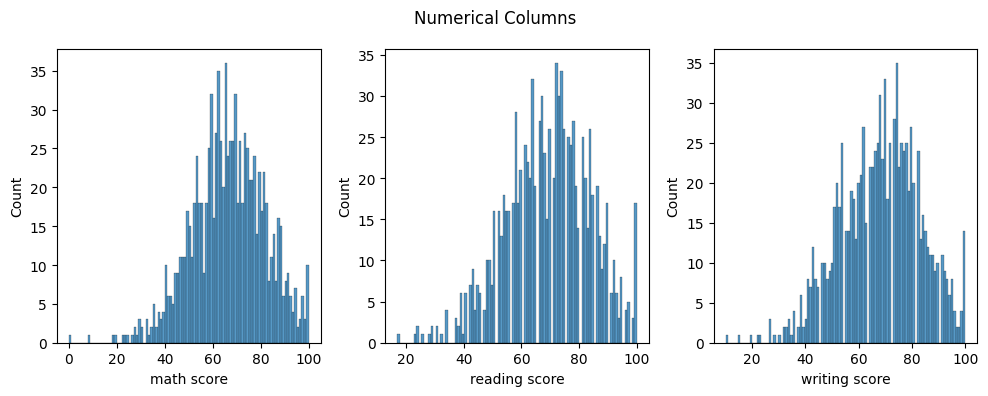

In [101]:
num_cols=[ "math score", "reading score", "writing score"]

fig, axes = plt.subplots(1,3, figsize=(10,4))

for count, col in enumerate(num_cols):
    ax = axes[count]
    sns.histplot(data=data_df,x=col,ax=ax,bins=100)


fig.suptitle('Numerical Columns')
plt.tight_layout()

In [102]:
data_df[['gender','math score']].groupby(['gender'], as_index=False).mean().round(2)



,gender,math score
0,female,63.63
1,male,68.73


<Axes: >

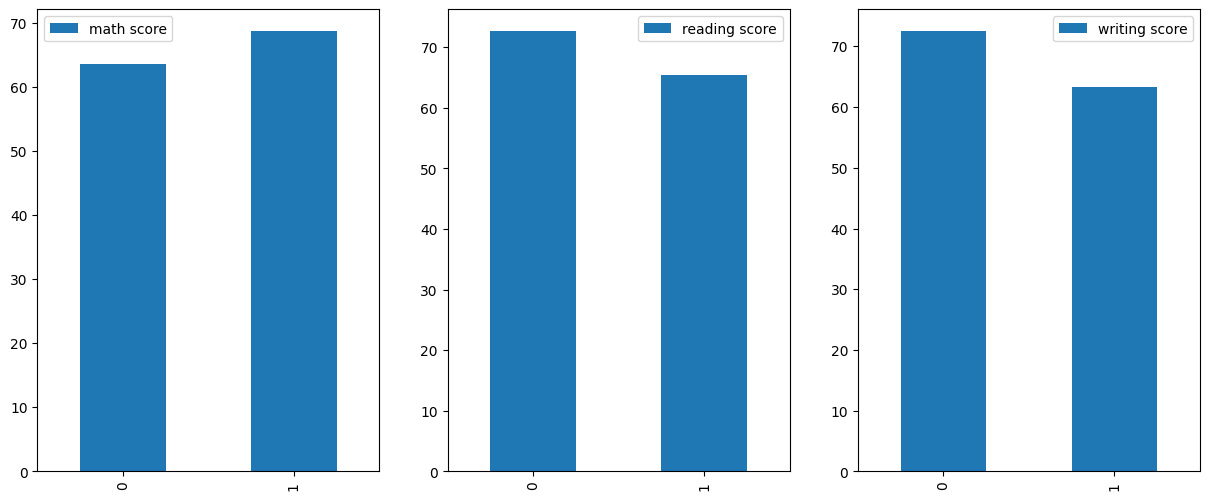

In [103]:
fig, axes = plt.subplots(1,3, figsize=(15,6))

data_df[['gender','math score']].groupby(['gender'],as_index=False).mean().plot(kind='bar', ax=axes[0])

data_df[['gender','reading score']].groupby(['gender'],as_index=False).mean().plot(kind='bar', ax=axes[1])

data_df[['gender','writing score']].groupby(['gender'],as_index=False).mean().plot(kind='bar', ax=axes[2])

<Axes: >

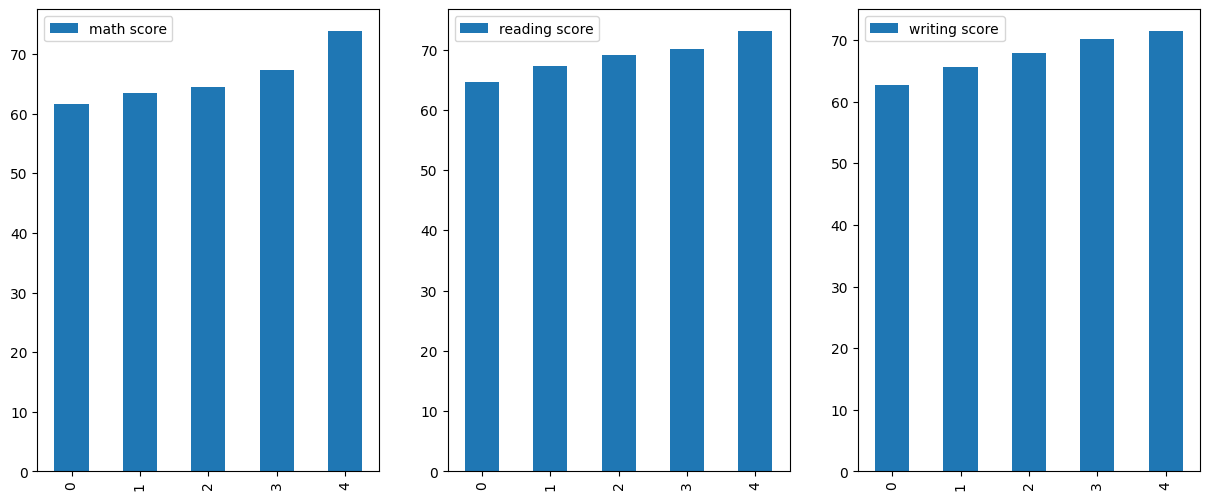

In [105]:
fig, axes = plt.subplots(1,3, figsize=(15,6))

col = 'race/ethnicity'


data_df[[col,'math score']].groupby([col],as_index=False).mean().plot(kind='bar', ax=axes[0])

data_df[[col,'reading score']].groupby([col],as_index=False).mean().plot(kind='bar', ax=axes[1])

data_df[[col,'writing score']].groupby([col],as_index=False).mean().plot(kind='bar', ax=axes[2])

<Axes: >

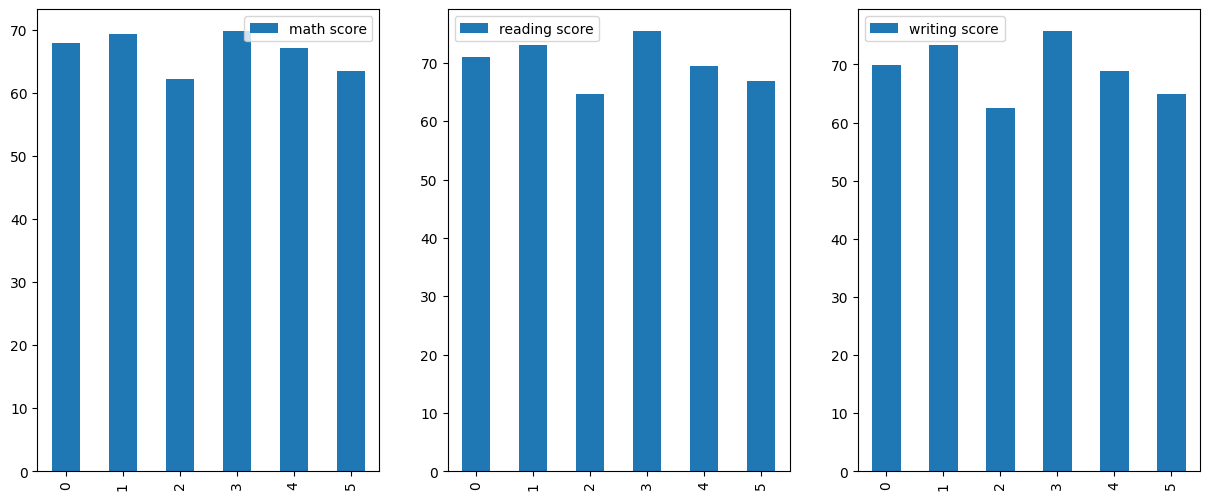

In [107]:
fig, axes = plt.subplots(1,3, figsize=(15,6))

col = 'parental level of education'




data_df[[col,'math score']].groupby([col],as_index=False).mean().plot(kind='bar', ax=axes[0])

data_df[[col,'reading score']].groupby([col],as_index=False).mean().plot(kind='bar', ax=axes[1])

data_df[[col,'writing score']].groupby([col],as_index=False).mean().plot(kind='bar', ax=axes[2])

<Axes: >

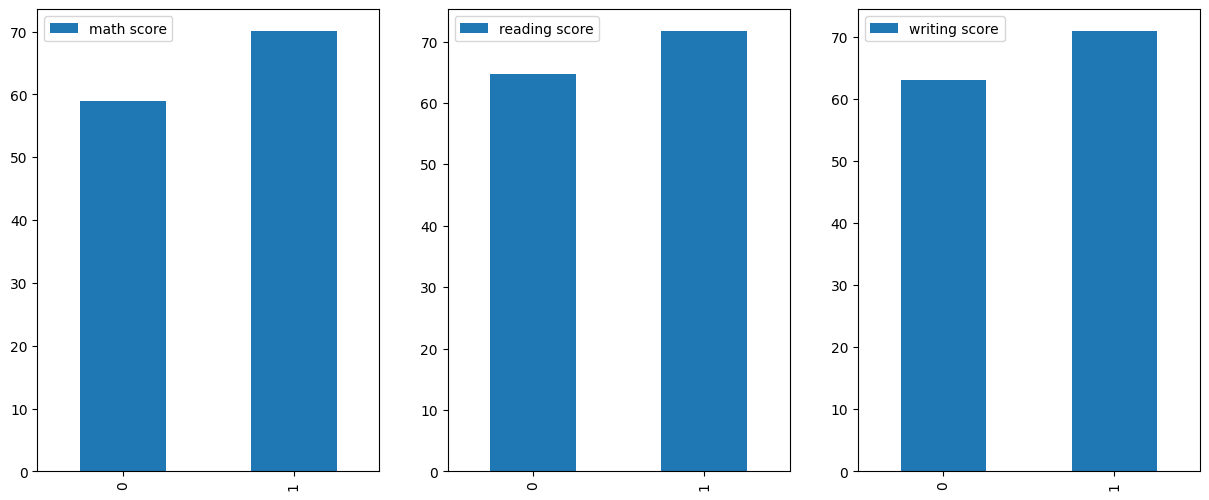

In [108]:
fig, axes = plt.subplots(1,3, figsize=(15,6))

col = 'lunch'

data_df[[col,'math score']].groupby([col],as_index=False).mean().plot(kind='bar', ax=axes[0])

data_df[[col,'reading score']].groupby([col],as_index=False).mean().plot(kind='bar', ax=axes[1])

data_df[[col,'writing score']].groupby([col],as_index=False).mean().plot(kind='bar', ax=axes[2])

<Axes: >

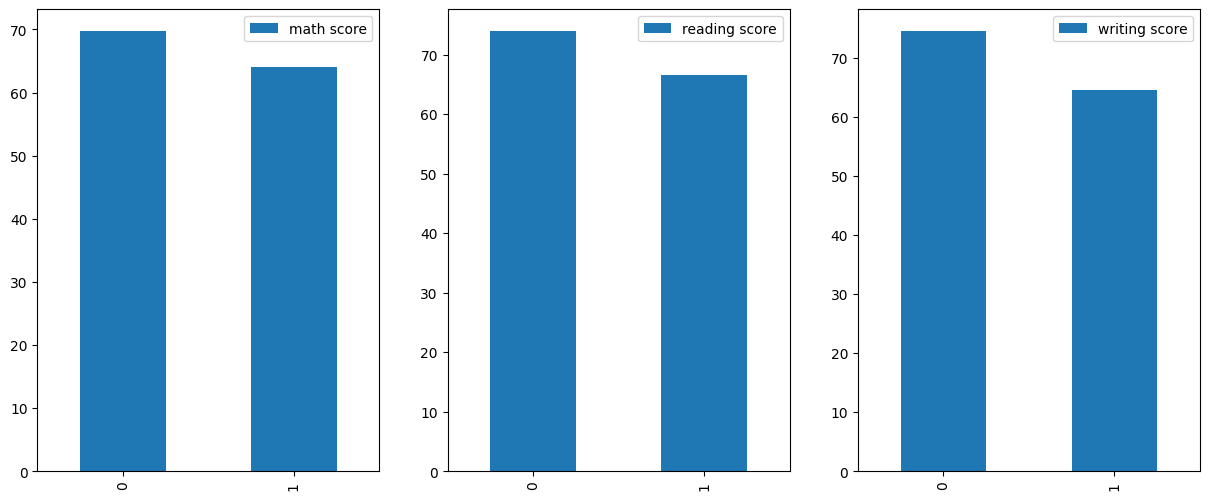

In [109]:
fig, axes = plt.subplots(1,3, figsize=(15,6))

col = 'test preparation course'

data_df[[col,'math score']].groupby([col],as_index=False).mean().plot(kind='bar', ax=axes[0])

data_df[[col,'reading score']].groupby([col],as_index=False).mean().plot(kind='bar', ax=axes[1])

data_df[[col,'writing score']].groupby([col],as_index=False).mean().plot(kind='bar', ax=axes[2])

<Axes: ylabel='writing score'>

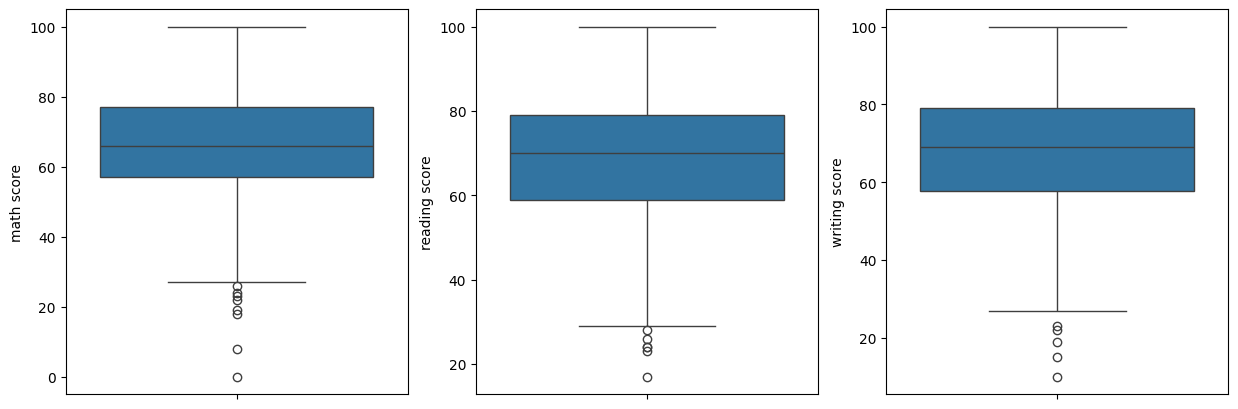

In [119]:
fig,axes=plt.subplots(1,3,figsize =(15,5))
sns.boxplot(data=data_df,y='math score',ax= axes[0])
sns.boxplot(data=data_df,y='reading score',ax= axes[1])
sns.boxplot(data=data_df,y='writing score',ax= axes[2])

In [124]:
out_list= []
q1 = np.percentile(data_df['math score'],25)# 1st quartile
q3 = np.percentile(data_df['math score'],75) #2nd quartile
iqr = q3-q1
ol_dis = iqr*1.5 # whisker length
outlier = data_df[data_df['math score']<q1-ol_dis].index
out_list.extend(outlier)
out_list

[17, 59, 145, 338, 466, 787, 842, 980]

In [125]:

q1 = np.percentile(data_df['reading score'],25)# 1st quartile
q3 = np.percentile(data_df['reading score'],75) #2nd quartile
iqr = q3-q1
ol_dis = iqr*1.5 # whisker length
outlier = data_df[data_df['reading score']<q1-ol_dis].index
out_list.extend(outlier)
out_list

[17, 59, 145, 338, 466, 787, 842, 980, 59, 76, 211, 327, 596, 980]

In [126]:
q1 = np.percentile(data_df['writing score'],25)# 1st quartile
q3 = np.percentile(data_df['writing score'],75) #2nd quartile
iqr = q3-q1
ol_dis = iqr*1.5 # whisker length
outlier = data_df[data_df['writing score']<q1-ol_dis].index
out_list.extend(outlier)
out_list

[17,
 59,
 145,
 338,
 466,
 787,
 842,
 980,
 59,
 76,
 211,
 327,
 596,
 980,
 59,
 76,
 327,
 596,
 980]

In [127]:
from collections import Counter
Counter(out_list)

Counter({59: 3,
         980: 3,
         76: 2,
         327: 2,
         596: 2,
         17: 1,
         145: 1,
         338: 1,
         466: 1,
         787: 1,
         842: 1,
         211: 1})

In [128]:
data_df.iloc[[59,980]]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
980,female,group B,high school,free/reduced,none,8,24,23


In [129]:
data_df['overall'] = (data_df['math score']+data_df['reading score']+data_df['writing score'])/3.0

<Axes: xlabel='gender', ylabel='overall'>

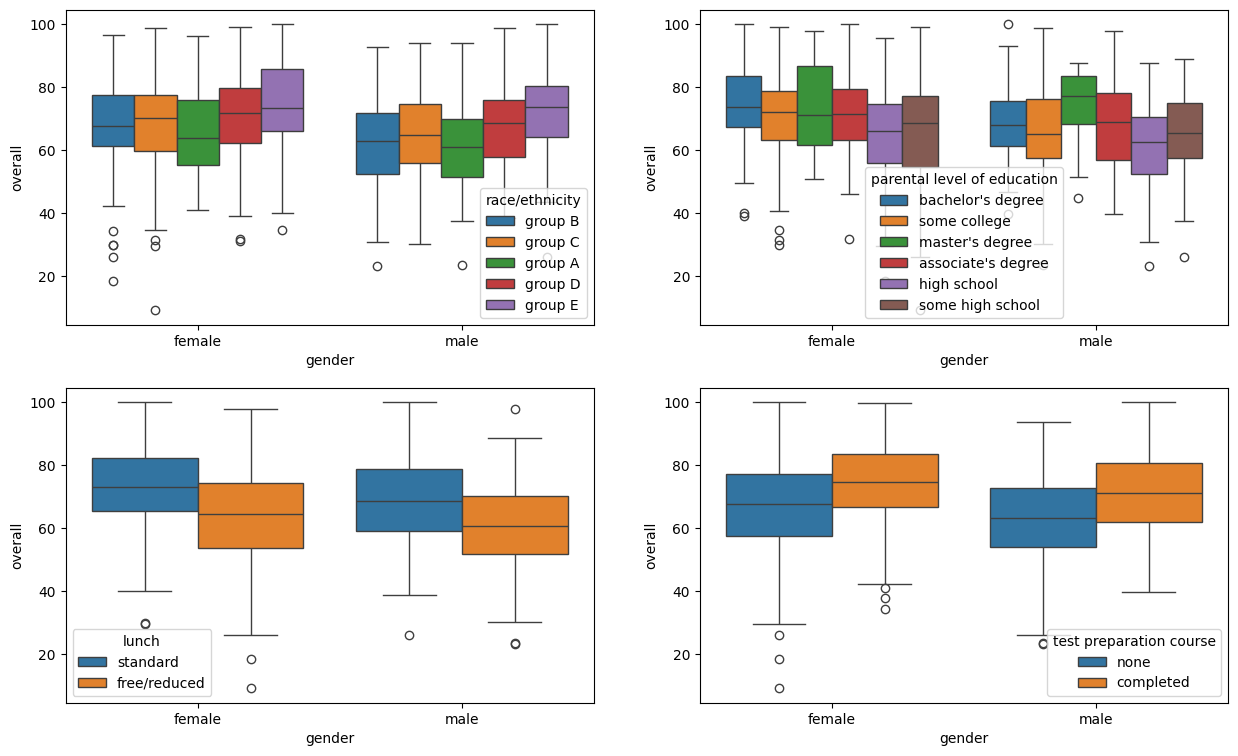

In [132]:
fig = plt.figure(figsize=(15,9))

ax=fig.add_subplot(221)
sns.boxplot(data=data_df, y='overall', x='gender',hue=cat_cols[1],ax=ax)

ax=fig.add_subplot(222)
sns.boxplot(data=data_df, y='overall', x='gender',hue=cat_cols[2],ax=ax)

ax=fig.add_subplot(223)
sns.boxplot(data=data_df, y='overall', x='gender',hue=cat_cols[3],ax=ax)
ax=fig.add_subplot(224)
sns.boxplot(data=data_df, y='overall', x='gender',hue=cat_cols[4],ax=ax)

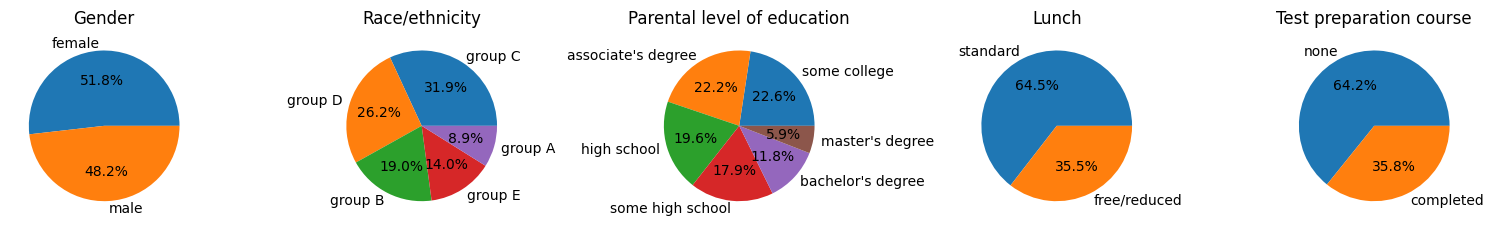

In [135]:
fig, axes = plt. subplots(1,5,figsize=(15,5))

for count, col in enumerate(cat_cols):
    ax = axes[count]
    data_df[col].value_counts().plot.pie(ax=ax,autopct='%1.1f%%')
    ax.set_title(col.capitalize())
    ax.set_ylabel('')
plt.tight_layout()

<Axes: xlabel='gender', ylabel='overall'>

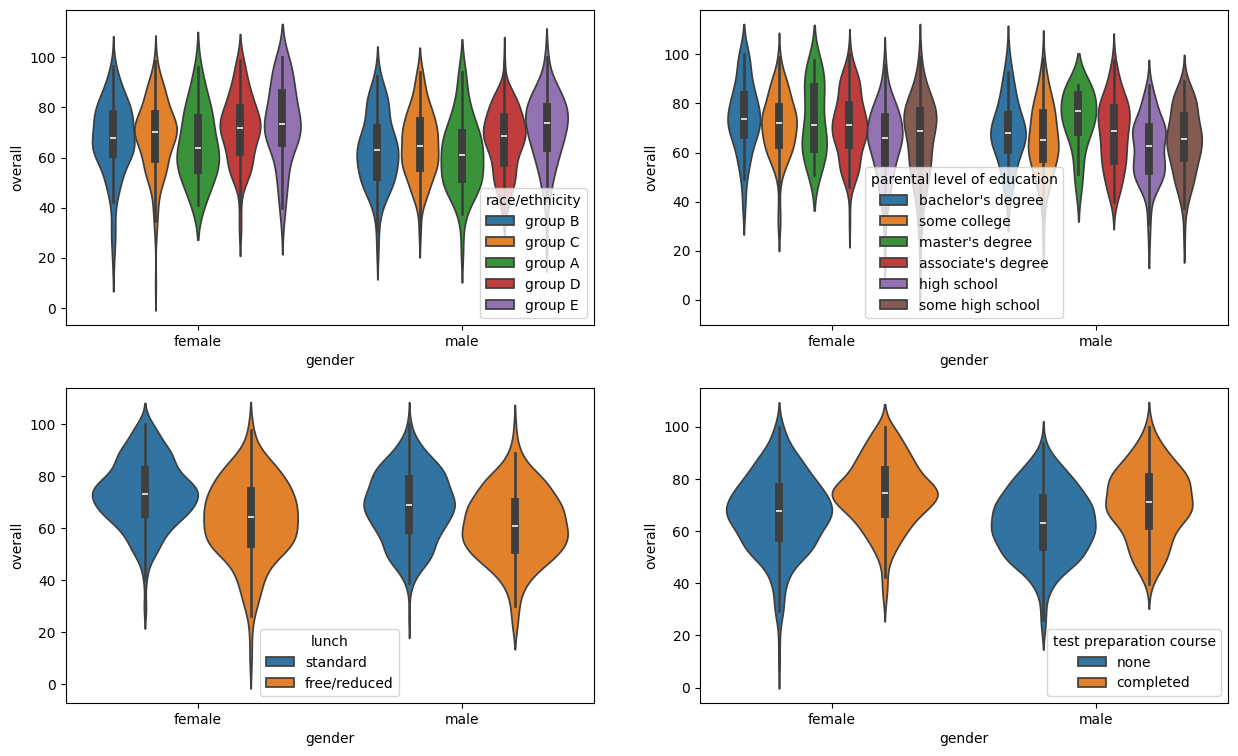

In [136]:
fig = plt.figure(figsize=(15,9))

ax=fig.add_subplot(221)
sns.violinplot(data=data_df, y='overall', x='gender',hue=cat_cols[1],ax=ax)

ax=fig.add_subplot(222)
sns.violinplot(data=data_df, y='overall', x='gender',hue=cat_cols[2],ax=ax)

ax=fig.add_subplot(223)
sns.violinplot(data=data_df, y='overall', x='gender',hue=cat_cols[3],ax=ax)
ax=fig.add_subplot(224)
sns.violinplot(data=data_df, y='overall', x='gender',hue=cat_cols[4],ax=ax)

<Axes: >

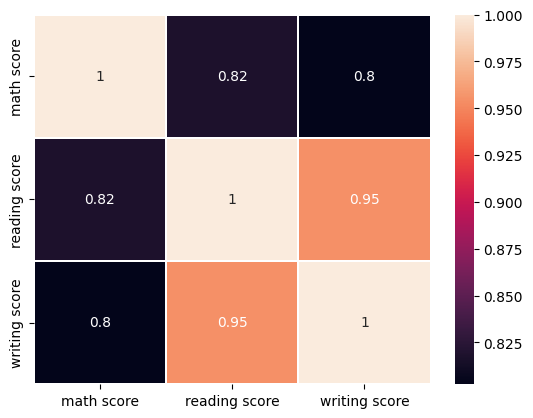

In [138]:
sns.heatmap(data_df[num_cols].corr(), annot=True, linewidth=0.2)